# Chapter 14

In [55]:
"""
Google Colaboratoryの場合のみ実行
"""
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
colab_path = "/content/drive/MyDrive/100programming/pythonML/"

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import tensorflow as tf
import tensorflow_datasets as tfds
from mlxtend.plotting import plot_decision_regions

plt.style.use({'figure.facecolor': 'white'})

## 14.2

In [ ]:
g = tf.Graph()
with g.as_default():
    a = tf.constant(1, name="a")
    b = tf.constant(2, name="b")
    c = tf.constant(3, name="c")
    z = 2 * (a - b) + c

with tf.compat.v1.Session(graph=g) as sess:
    print("Result: z =", sess.run(z))

Result: z = 1


In [ ]:
a = tf.constant(1, name="a")
b = tf.constant(2, name="b")
c = tf.constant(3, name="c")
z = 2 * (a - b) + c
tf.print("Result: z =", z)

Result: z = 1


In [ ]:
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name="tf_a")
    b = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name="tf_b")
    c = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name="tf_c")
    z = 2 * (a - b) + c

with tf.compat.v1.Session(graph=g) as sess:
    feed_dict = {a: 1, b: 2, c: 3}
    print("Result: z =", sess.run(z, feed_dict=feed_dict))

Result: z = 1


In [ ]:
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print("Scalar Inputs:", compute_z(1, 2, 3))
tf.print("Rank 1 Inputs:", compute_z([1], [2], [3]))
tf.print("Rank 2 Inputs:", compute_z([[1]], [[2]], [[3]]))

Scalar Inputs: 1
Rank 1 Inputs: [1]
Rank 2 Inputs: [[1]]


In [ ]:
@tf.function
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print("Scalar Inputs:", compute_z(1, 2, 3))
tf.print("Rank 1 Inputs:", compute_z([1], [2], [3]))
tf.print("Rank 2 Inputs:", compute_z([[1]], [[2]], [[3]]))

Scalar Inputs: 1
Rank 1 Inputs: [1]
Rank 2 Inputs: [[1]]


In [ ]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None], dtype=tf.int32), tf.TensorSpec(shape=[None], dtype=tf.int32), tf.TensorSpec(shape=[None], dtype=tf.int32),))
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print("Rank 1 Inputs:", compute_z([1], [2], [3]))
tf.print("Rank 2 Inputs:", compute_z([1, 2], [2, 4], [3, 6]))

Rank 1 Inputs: [1]
Rank 2 Inputs: [1 2]


## 14.3

In [ ]:
a = tf.Variable(initial_value=3.14, name="var_a")
print(a)
b = tf.Variable(initial_value=[1, 2, 3], name="var_b")
print(b)
c = tf.Variable(initial_value=[True, False], dtype=tf.bool)
print(c)
d = tf.Variable(initial_value=["abc"], dtype=tf.string)
print(d)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>
<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=bool, numpy=array([ True, False])>
<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


In [ ]:
w = tf.Variable([1, 2, 3], trainable=False)
print(w.trainable)

print(w.assign([3, 1, 4], read_value=True))
w.assign_add([2, -1, 2], read_value=False)
print(w.value())

tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3,)))

v = tf.Variable(init(shape=(2, 3)))
tf.print(v)

class MyModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape=(2, 3)), trainable=True)
        self.w2 = tf.Variable(init(shape=(1, 2)), trainable=False)
m = MyModule()
print("All module variables:", [v.shape for v in m.variables])
print("Trainable variable:", [v.shape for v in m.trainable_variables])

tf.random.set_seed(1)
w = tf.Variable(tf.random.uniform((3, 3)))
@tf.function
def compute_z(x):
    return tf.matmul(w, x)
x = tf.constant([[1], [2], [3]], dtype=tf.float32)
tf.print(compute_z(x))

False
<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4], dtype=int32)>
tf.Tensor([5 0 6], shape=(3,), dtype=int32)
[-0.722795904 1.01456821 0.251808226]
[[0.28982234 -0.782292783 -0.0453658961]
 [0.960991383 -0.120003454 0.708528221]]
All module variables: [TensorShape([2, 3]), TensorShape([1, 2])]
Trainable variable: [TensorShape([2, 3])]
[[3.8610158]
 [2.94593048]
 [3.82629013]]


## 14.4

In [ ]:
w = tf.Variable(1.0)
b = tf.Variable(0.5)
print(w.trainable, b.trainable)

x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])
with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))
dloss_dw = tape.gradient(loss, w)
tf.print("dL/dw:", dloss_dw)

tf.print(2 * x * (w * x + b - y))

True True
dL/dw: -0.559999764
[-0.559999764]


In [ ]:
with tf.GradientTape() as tape:
    tape.watch(x)
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))
dloss_dx = tape.gradient(loss, x)
tf.print("dL/dx:", dloss_dx)

dL/dx: [-0.399999857]


In [ ]:
with tf.GradientTape(persistent=True) as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))
dloss_dw = tape.gradient(loss, w)
tf.print("dL/dw:", dloss_dw)
dloss_db = tape.gradient(loss, b)
tf.print("dL/db:", dloss_db)

optimizer = tf.keras.optimizers.SGD()
optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))
tf.print("Updated w:", w)
tf.print("Updated bias:", b)

dL/dw: -0.559999764
dL/db: -0.399999857
Updated w: 1.0056
Updated bias: 0.504


## 14.5

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation="relu"))
model.add(tf.keras.layers.Dense(units=32, activation="relu"))
model.build(input_shape=(None, 4))
model.summary()

for v in model.variables:
    print("{:20s}".format(v.name), v.trainable, v.shape)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(
    units=16,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.glorot_uniform(),
    bias_initializer=tf.initializers.Constant(2.0)
))
model.add(tf.keras.layers.Dense(
    units=32,
    activation=tf.keras.activations.sigmoid,
    kernel_regularizer=tf.keras.regularizers.l1
))

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
             tf.keras.metrics.Accuracy(),
             tf.keras.metrics.Precision(),
             tf.keras.metrics.Recall(),
    ]
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________
dense/kernel:0       True (4, 16)
dense/bias:0         True (16,)
dense_1/kernel:0     True (16, 32)
dense_1/bias:0       True (32,)


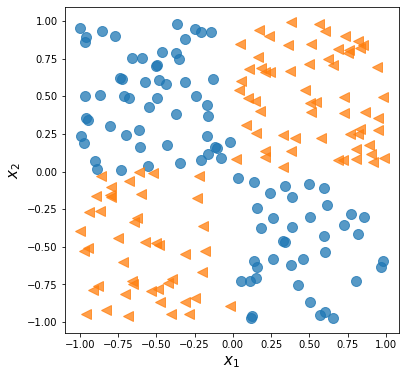

In [ ]:
tf.random.set_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0
x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], "o", alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], "<", alpha=0.75, markersize=10)
plt.xlabel(r"$x_1$", size=15)
plt.ylabel(r"$x_2$", size=15)
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(2,), activation="sigmoid"))
model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=0)  # そこそこ時間かかる

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


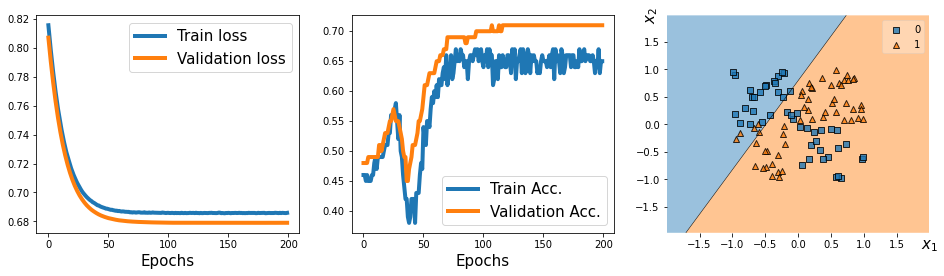

In [ ]:
def tf_plot(model, hist):
    history = hist.history
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(1, 3, 1)
    plt.plot(history["loss"], lw=4)
    plt.plot(history["val_loss"], lw=4)
    plt.legend(["Train loss", "Validation loss"], fontsize=15)
    ax.set_xlabel("Epochs", size=15)
    ax = fig.add_subplot(1, 3, 2)
    plt.plot(history["binary_accuracy"], lw=4)
    plt.plot(history["val_binary_accuracy"], lw=4)
    plt.legend(["Train Acc.", "Validation Acc."], fontsize=15)
    ax.set_xlabel("Epochs", size=15)
    ax = fig.add_subplot(1, 3, 3)
    plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
    ax.set_xlabel(r"$x_1$", size=15)
    ax.xaxis.set_label_coords(1, -0.025)
    ax.set_ylabel(r"$x_2$", size=15)
    ax.yaxis.set_label_coords(-0.025, 1)
    plt.show()

tf_plot(model, hist)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


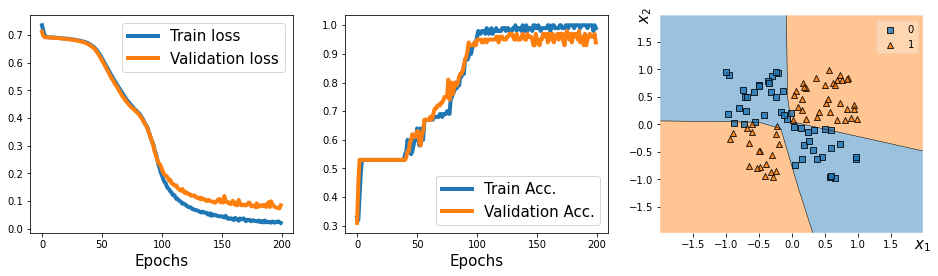

In [ ]:
tf.random.set_seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2,), activation="relu"))
model.add(tf.keras.layers.Dense(units=4, activation="relu"))
model.add(tf.keras.layers.Dense(units=4, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=0)  # そこそこ時間かかる

tf_plot(model, hist)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


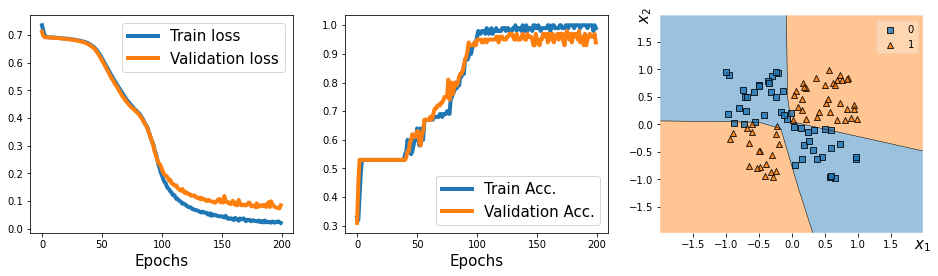

In [ ]:
tf.random.set_seed(1)
inputs = tf.keras.Input(shape=(2,))
h1 = tf.keras.layers.Dense(units=4, activation="relu")(inputs)
h2 = tf.keras.layers.Dense(units=4, activation="relu")(h1)
h3 = tf.keras.layers.Dense(units=4, activation="relu")(h2)
outputs = tf.keras.layers.Dense(units=1, activation="sigmoid")(h3)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=0)  # そこそこ時間かかる

tf_plot(model, hist)

In [ ]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(units=4, activation="relu")
        self.hidden_2 = tf.keras.layers.Dense(units=4, activation="relu")
        self.hidden_3 = tf.keras.layers.Dense(units=4, activation="relu")
        self.output_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")
    
    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             multiple                  12        
_________________________________________________________________
dense_14 (Dense)             multiple                  20        
_________________________________________________________________
dense_15 (Dense)             multiple                  20        
_________________________________________________________________
dense_16 (Dense)             multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


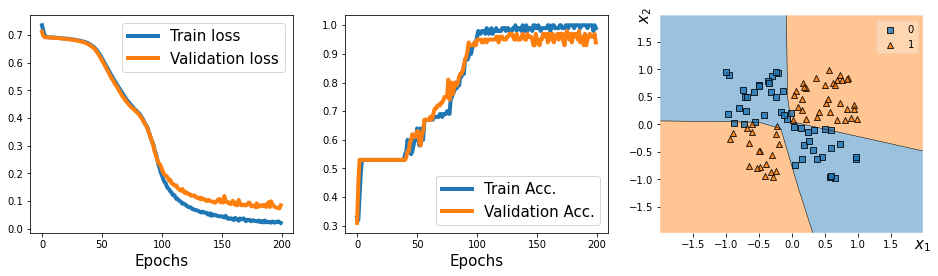

In [ ]:
tf.random.set_seed(1)
model = MyModel()
model.build(input_shape=(None, 2))
model.summary()
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=0)  # そこそこ時間かかる

tf_plot(model, hist)

In [ ]:
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
        self.output_dim = output_dim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.w = self.add_weight(name="weights", shape=(input_shape[1], self.output_dim), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(self.output_dim,), initializer="zeros", trainable=True)
    
    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(shape=(batch, dim), mean=0.0, stddev=self.noise_stddev)
            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        
        z = tf.matmul(noisy_inputs, self.w) + self.b
        return tf.keras.activations.relu(z)
    
    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({"output_dim": self.output_dim, "noise_stddev": self.noise_stddev})
        return config

[[0 0.00821428 0 0]]
[[0 0.0108502861 0 0]]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
noisy_linear_1 (NoisyLinear) (None, 4)                 12        
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


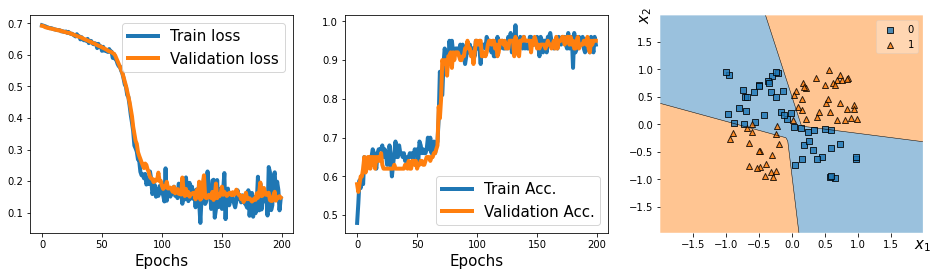

In [ ]:
tf.random.set_seed(1)
noisy_layer = NoisyLinear(4)
noisy_layer.build(input_shape=(None, 4))
x = tf.zeros(shape=(1, 4))
tf.print(noisy_layer(x, training=True))

config = noisy_layer.get_config()
new_layer = NoisyLinear.from_config(config)
tf.print(new_layer(x, training=True))

tf.random.set_seed(1)
model = tf.keras.Sequential([
                             NoisyLinear(4, noise_stddev=0.1),
                             tf.keras.layers.Dense(units=4, activation="relu"),
                             tf.keras.layers.Dense(units=4, activation="relu"),
                             tf.keras.layers.Dense(units=1, activation="sigmoid")
                             ])
model.build(input_shape=(None, 2))
model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=0)  # そこそこ時間かかる

tf_plot(model, hist)

## 14.6

In [58]:
dataset_path = tf.keras.utils.get_file(colab_path+"auto-mpg.data", ("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"))
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "ModelYear", "Origin"]
df = pd.read_csv(dataset_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

In [59]:
df = df.dropna()
df = df.reset_index(drop=True)
df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.8)
train_stats = df_train.describe().transpose()
numeric_column_names = ["Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration"]
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, "mean"]
    std = train_stats.loc[col_name, "std"]
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean) / std
    df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean) / std
print(df_train_norm.tail())

numeric_features = []
for col_name in numeric_column_names:
    numeric_features.append(tf.feature_column.numeric_column(key=col_name))

feature_year = tf.feature_column.numeric_column(key="ModelYear")
bucketized_features = []
bucketized_features.append(tf.feature_column.bucketized_column(source_column=feature_year, boundaries=[73, 76, 79]))

feature_origin = tf.feature_column.categorical_column_with_vocabulary_list(key="Origin", vocabulary_list=[1, 2, 3])

categorical_indicator_features = []
categorical_indicator_features.append(tf.feature_column.indicator_column(feature_origin))

      MPG  Cylinders  Displacement  ...  Acceleration  ModelYear  Origin
299  34.2  -0.836182     -0.837172  ...     -0.902880         79       1
283  17.0   1.532370      1.115943  ...     -0.094503         79       1
211  13.0   1.532370      1.555393  ...     -1.343814         76       1
176  23.0  -0.836182     -0.690688  ...      0.493409         75       2
199  18.5   0.348094      0.578836  ...      0.199453         76       1

[5 rows x 8 columns]


In [ ]:
def train_input_fn(df_train, batch_size=8):
    df = df_train.copy()
    train_x, train_y = df, df.pop("MPG")
    dataset = tf.data.Dataset.from_tensor_slices((dict(train_x), train_y))
    return dataset.shuffle(1000).repeat().batch(batch_size)

ds = train_input_fn(df_train_norm)
batch = next(iter(ds))
print("Keys:", batch[0].keys())
print("Batch Model Years:", batch[0]["ModelYear"])

def eval_input_fn(df_test, batch_size=8):
    df = df_test.copy()
    test_x, test_y = df, df.pop("MPG")
    dataset = tf.data.Dataset.from_tensor_slices((dict(test_x), test_y))
    return dataset.batch(batch_size)

Keys: dict_keys(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'ModelYear', 'Origin'])
Batch Model Years: tf.Tensor([80 80 78 76 75 78 71 76], shape=(8,), dtype=int64)


In [ ]:
all_features_columns = (numeric_features + bucketized_features + categorical_indicator_features)

In [ ]:
regressor = tf.estimator.DNNRegressor(feature_columns=all_features_columns, hidden_units=[32, 10], model_dir=colab_path+"models/autompg-dnnregressor/")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/content/drive/MyDrive/100programming/pythonML/models/autompg-dnnregressor/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
EPOCHS = 1000
BATCH_SIZE = 8
total_steps = EPOCHS * int(np.ceil(len(df_train) / BATCH_SIZE))
print("Training Steps:", total_steps)

regressor.train(input_fn=lambda:train_input_fn(df_train_norm, batch_size=BATCH_SIZE), steps=total_steps)  # 時間かかる

reloaded_regressor = tf.estimator.DNNRegressor(
    feature_columns=all_features_columns,
    hidden_units=[32, 10],
    warm_start_from=colab_path+"models/autompg-dnnregressor/",
    model_dir=colab_path+"models/autompg-dnnregressor/"
)

eval_results = reloaded_regressor.evaluate(input_fn=lambda:eval_input_fn(df_test_norm, batch_size=8))
print("Average-Loss {:.4f}".format(eval_results["average_loss"]))

pred_res = regressor.predict(input_fn=lambda: eval_input_fn(df_test_norm, batch_size=8))
print(next(iter(pred_res)))

Training Steps: 40000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/100programming/pythonML/models/autompg-dnnregressor/model.ckpt-40000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 40000...
INFO:tensorflow:Saving checkpoints for 40000 into /content/drive/MyDrive/100programming/pythonML/models/autompg-dnnregressor/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 40000...
INFO:tensorflow:loss = 23.827274, step = 40000
INFO:tensorflow:global_step/sec: 719.691
INFO:tensorflow:loss = 3.4269574, step = 40100 (0.143 sec)
INFO:tensorflow:global_step/sec: 1058.29
INFO:tensorflow:loss = 18.02272, step = 40200 (0.093 se

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/content/drive/MyDrive/100programming/pythonML/models/autompg-dnnregressor/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Callin

In [ ]:
boosted_tree = tf.estimator.BoostedTreesRegressor(feature_columns=all_features_columns, n_batches_per_layer=20, n_trees=200)
boosted_tree.train(input_fn=lambda:train_input_fn(df_train_norm, batch_size=BATCH_SIZE))
eval_results = boosted_tree.evaluate(input_fn=lambda:eval_input_fn(df_test_norm, batch_size=8))
print("Average-Loss {:.4f}".format(eval_results["average_loss"]))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpc528hkha', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Plea

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20
steps_per_epoch = np.ceil(60000 / BATCH_SIZE)

def preprocess(item):
    image = item["image"]
    label = item["label"]
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.reshape(image, (-1,))
    return {"image-pixels": image}, label[..., tf.newaxis]

def train_input_fn():
    datasets = tfds.load(name="mnist")
    mnist_train = datasets["train"]
    dataset = mnist_train.map(preprocess)
    dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset.repeat()

def eval_input_fn():
    datasets = tfds.load(name="mnist")
    mnist_test = datasets["test"]
    dataset = mnist_test.map(preprocess).batch(BATCH_SIZE)
    return dataset

image_feature_column = tf.feature_column.numeric_column(key="image-pixels", shape=(28*28))
"""
本書に書かれている通り, RuntimeError: Graph is finalized and cannot be modified.とでる↓
"""
dnn_classifier = tf.estimator.DNNClassifier(feature_columns=[image_feature_column], hidden_units=[32, 16], n_classes=10, model_dir=colab_path+"models/mnist-dnn/")

dnn_classifier.train(input_fn=train_input_fn, steps=NUM_EPOCHS * steps_per_epoch)
eval_result = dnn_classifier.evaluate(input_fn=eval_input_fn)
print(eval_result)

'\n本書に書かれている通り, RuntimeError: Graph is finalized and cannot be modified.とでる↓\ndnn_classifier = tf.estimator.DNNClassifier(feature_columns=[image_feature_column], hidden_units=[32, 16], n_classes=10, model_dir=colab_path+"models/mnist-dnn/")\n\ndnn_classifier.train(input_fn=train_input_fn, steps=NUM_EPOCHS * steps_per_epoch)\neval_result = dnn_classifier.evaluate(input_fn=eval_input_fn)\nprint(eval_result)'

In [60]:
tf.random.set_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0
x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

"""
RuntimeError: Graph is finalized and cannot be modified.とでる↓
"""
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(2,), name="input-features"),
                             tf.keras.Dense(units=4, activation="relu"),
                             tf.keras.Dense(units=4, activation="relu"),
                             tf.keras.Dense(units=4, activation="relu"),
                             tf.keras.Dense(units=1, activation="sigmoid")
])

def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices(({"input-features": x_train}, y_train.reshape(-1, 1)))
    return dataset.shuffle(100).repeat().batch(batch_size)

def eval_input_fn(x_test, y_test=None, batch_size=8):
    if y_test is None:
        dataset = tf.data.Dataset.from_tensor_slices({"input-features": x_test})
    else:
        dataset = tf.data.Dataset.from_tensor_slices(({"input-features": x_test}, y_test.reshape(-1, 1)))
    return dataset.batch(batch_size)

features = [tf.feature_column.numeric_column(key="input-features:", shape=(2,))]

model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
my_estimator = tf.keras.estimator.model_to_estimator(keras_model=model, model_dir=colab_path+"models/estimator-for-XOR/")

num_epochs = 200
batch_size = 2
steps_per_epoch = np.ceil(len(x_train) / batch_size)
my_estimator.train(input_fn=lambda: train_input_fn(x_train, y_train, batch_size), steps=num_epochs * steps_per_epoch)
my_estimator.evaluate(input_fn=lambda: eval_input_fn(x_valid, y_valid, batch_size))

RuntimeError: ignored